In [1]:
import pandas as pd

## DataFrame как структура данных

DataFrame является двумерной структурой и представляется в виде таблицы, в которой есть строки и столбцы: столбцами в DataFrame выступают объекты Series, а строки формируются из их элементов. Также в DataFrame есть метки (индексы), которые соответствуют каждой строке таблицы.

Приведём пример такой структуры:

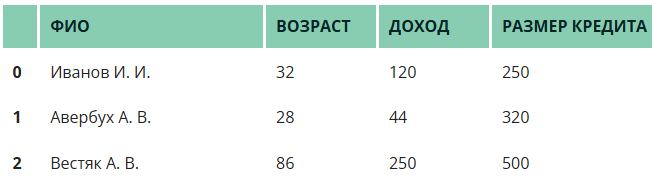

В дальнейшем слова DataFrame и таблица будут употребляться как синонимы. Также синонимами в Data Science являются слова столбец таблицы и признак.

## Создание DataFrame

DataFrame создаётся с помощью функции pd.DataFrame().

In [6]:
# Способ 1 Самый простой
# создания DataFrame — из словаря, ключами которого являются имена столбцов будущей таблицы, 
# а значениями — списки, в которых хранится содержимое этих столбцов:

countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'area': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})

# Обратите внимание, что, так как мы не задали метки (индексы) DataFrame, 
# они были сгенерированы автоматически. Исправим это, задав индексы вручную:

countries_df.index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']


display(countries_df)

,country,population,area
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,146.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.04,2724902


In [5]:
# Способ 2 
# Также DataFrame можно создать из вложенного списка, 
# внутренние списки которого будут являться строками новой таблицы

countries_df = pd.DataFrame(
    data = [
        ['Англия', 56.29, 133396],
        ['Канада', 38.05, 9984670],
        ['США', 322.28, 9826630],
        ['Россия', 146.24, 17125191],
        ['Украина', 45.5, 603628],
        ['Беларусь', 9.5, 207600],
        ['Казахстан', 17.04, 2724902]
    ],
    columns= ['country', 'population', 'area'],
    index = ['UK', 'CA', 'US', 'RU', 'UA', 'BY', 'KZ']
)
display(countries_df)

,country,population,area
UK,Англия,56.29,133396
CA,Канада,38.05,9984670
US,США,322.28,9826630
RU,Россия,146.24,17125191
UA,Украина,45.50,603628
BY,Беларусь,9.50,207600
KZ,Казахстан,17.04,2724902


## Axis в DataFrame

Как уже было сказано, DataFrame является двумерной структурой данных, что означает наличие двух возможных направлений движения в ней: вдоль строк и вдоль столбцов. 

Например, мы можем удалять как строки, так и столбцы таблицы, вычислять среднее значение как по столбцам, так и по строкам таблицы.

При работе с Pandas важно уметь указывать направление работы метода, который используется. Для этого вводится понятие axis (ось, координата). Движение по **строкам** в таблице обозначается axis с индексом **0**, а движение по **столбцам** — axis с индексом **1**.

Данный параметр заложен во все методы, которые могут работать в двух направлениях и по умолчанию в большинстве из них axis=0, то есть они выполняют операции со строками, если не задавать axis вручную.

Рассмотрим разницу в результатах работы методов в зависимости от параметра axis на примере использования метода DataFrame mean() — вычисление среднего по таблице.

In [ ]:
# Считаем среднее по строкам (axis = 0) в каждом столбце:
countries_df.mean(axis=0, numeric_only=True)

# В данном случае среднее было рассчитано по строкам для столбцов population и area.
#Обратите внимание на то, что так как не все столбцы в нашей таблице являются числовыми, 
# то нам необходимо установить параметр numeric_only в значение True (вести расчёт только по числовым столбцам). 
# Это делается для того, чтобы не получать предупреждений (warnings).

population    9.070000e+01
area          5.800860e+06
dtype: float64

In [ ]:
# Считаем среднее по столбцам (axis = 1) в каждой строке:
countries_df.mean(axis=1, numeric_only=True)

#Здесь среднее было рассчитано по числовым столбцам для каждой строки в таблице

UK      66726.145
CA    4992354.025
US    4913476.140
RU    8562668.620
UA     301836.750
BY     103804.750
KZ    1362459.520
dtype: float64

## Доступ к данным в DataFrame

Доступ к столбцу можно получить разными способами:

In [ ]:
# Можно обратиться к DataFrame по имени столбца через точку:

countries_df.population

# Однако использование такого способа возможно только тогда, когда имя столбца указано без пробелов

UK     56.29
CA     38.05
US    322.28
RU    146.24
UA     45.50
BY      9.50
KZ     17.04
Name: population, dtype: float64

In [12]:
# Другой вариант — обратиться к DataFrame по индексу и указать имя столбца:

display(countries_df['population'])

# Обратите внимание, что, как и ожидалось, при обращении к столбцу DataFrame мы получаем объект Series с 
# именем, соответствующим имени столбца. Удостовериться в этом можно с помощью функции type():

type(countries_df.population)

UK     56.29
CA     38.05
US    322.28
RU    146.24
UA     45.50
BY      9.50
KZ     17.04
Name: population, dtype: float64

pandas.core.series.Series

Для того чтобы получить доступ к ячейкам таблицы, используются уже знакомые нам loc и iloc.

При этом, в соответствии с механизмом работы axis, при обращении к DataFrame по индексам с помощью loc (iloc) первым индексом указывается индекс (порядковый номер), соответствующий строкам, а вторым — имя (порядковый номер) столбца.

In [13]:
#Получим площадь Великобритании:
display(countries_df.loc['UK', 'area'])

#Получим население и площадь, соответствующие России:
display(countries_df.loc['RU', ['population', 'area']])

#Сделаем вырезку из таблицы и получим информацию о населении и площади, соответствующую Украине, Беларуси и Казахстану:
display(countries_df.loc[['UA', 'BY', 'KZ'],['population', 'area']])

#или
display(countries_df.iloc[4:8, 1:3])

np.int64(133396)

population      146.24
area          17125191
Name: RU, dtype: object

,population,area
UA,45.50,603628
BY,9.50,207600
KZ,17.04,2724902


,population,area
UA,45.50,603628
BY,9.50,207600
KZ,17.04,2724902
